In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
def roulette():
    field_color = {}
    for red_field in range(1,19):
        field_value = np.random.randint(1,37)
        
        while field_value in field_color.keys():
            field_value = np.random.randint(1,37)
        
        field_color[field_value] = 'красное'
    
    for black_field in range(1,37):
        if black_field not in field_color.keys():
            field_color[black_field] = 'чёрное'            
    

    field = np.random.randint(0,37)
    if field == 0:
        print('Зеро')
    elif field % 2 == 0:
        print(field, field_color[field], 'чётное поле')
    else:
        print(field, field_color[field], 'нечётное поле')

In [3]:
roulette()

10 чёрное чётное поле


### 2. 1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере  подбрасывания монетки.

#### Теорема сложения вероятностей для двух несовместных событий : P(A+B)=P(A)+P(B)

In [4]:

N = 1000
he, ta = 0, 0

for i in range(0, N):
    x = np.random.uniform(0, 10)
    if x < 5:
        he += 1
    else:
        ta += 1
        
print(f'Всего бросков: {N}.\nОрел выпал {he} раз(а), а решка {ta} раз(а).\n')
print(f'Теорема сложения вероятностей: {(he + ta) / N == he / N + ta / N}!')

Всего бросков: 1000.
Орел выпал 493 раз(а), а решка 507 раз(а).

Теорема сложения вероятностей: True!


#### Вычислим вероятностью событий (красное + черное), как разницу между 1 и вероятностью зеро.(Т.к. зеро,красное и черное в сумме составляют полную группу событий)

In [5]:
zero_odds = round(1/37,4)
1 - zero_odds

0.973

#### Вероятности равны, соответственно вероятность суммы событий (красное и черное) равна сумме вероятностей красного и черного. Т.Д.

### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [6]:
def random_sum():
    random_sums = []
    for group in range(10):
        group_sum = 0
        for x_number in range(10):
            x = np.random.uniform(10)
            group_sum += x
        random_sums.append(group_sum)
    return random_sums

In [7]:
x = random_sum()

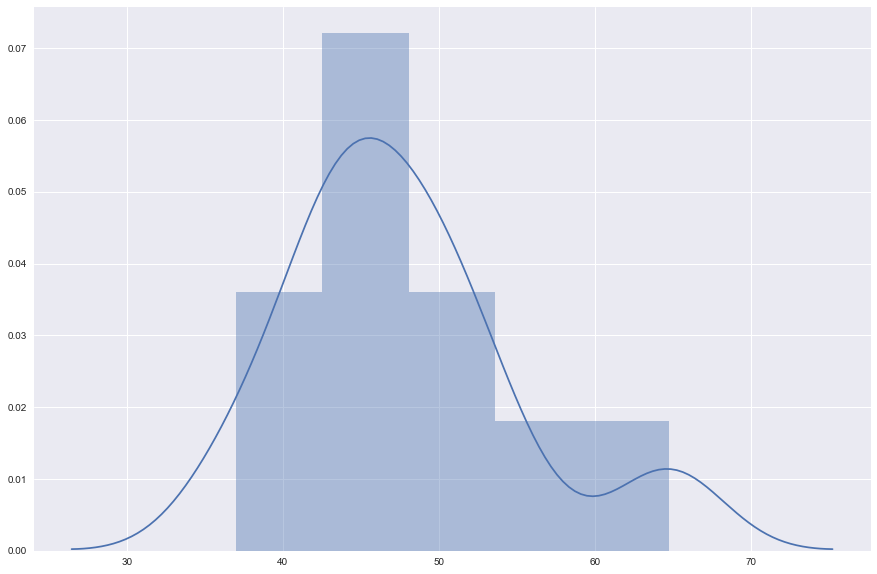

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(x, bins = 5, norm_hist = True)
plt.show()

### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [9]:
k,n = 0, 10000000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3749348 10000000 0.3749348


Вероятность 2-х успехов при 4-х испытаниях равна:
### $P_4(2) = С^2_4 * \frac{1}{2^4}$ , $ C^2_4 = \frac{4!}{2! * (2-4)!}$

In [10]:
P = (np.math.factorial(4)/(np.math.factorial(2)*np.math.factorial(4-2))) * (1 / (2**4))
P

0.375

Результаты совпадают.

### 4. Повторите расчеты, взяв другие значения n и k.

In [11]:
def odds(n,k, N = 10000000):
    x = np.zeros(N)
    k_ = 0
    for i in range(n):
        a = np.random.randint(0, 2 , N)
        x += a
    for j in range(N):
        if x[j] == k:
            k_ += 1 
            
    P = (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))) * (1 / (2**n))
    
    print('Вероятность расчитаная через метод Монте-Карло :', round(k_/N, 3))
    print('Вероятность расчитаная через биномиальное распределение :', round(P, 3))

In [12]:
odds(n = 100,k = 58)

Вероятность расчитаная через метод Монте-Карло : 0.022
Вероятность расчитаная через биномиальное распределение : 0.022


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле  $R=\frac{\sum (x_i - x_m) * (y_i - y_m)}{\sqrt{\sum (x_i - x_m)^2 * \sum(y_i - y_m)^2}}$

In [13]:
n = 1000
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n


R = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sqrt(np.sum((x - np.mean(x))**2)*np.sum((y - np.mean(y))**2))

print('Коэффициент корреляции :', R)

sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x, y, legend = 'full')
sns.lineplot([0,1],[b,a + b], color = 'crimson')
plt.show()

Коэффициент корреляции : 0.9190978963785614


AttributeError: module 'seaborn' has no attribute 'scatterplot'